In [1]:
from google.colab import  drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [148]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
sys.version

'3.7.10 (default, Feb 20 2021, 21:17:23) \n[GCC 7.5.0]'

In [149]:
data_path = '/content/gdrive/MyDrive/Gsoc/jetData.pkl'
data  = pd.read_pickle(data_path)
print('Data Sample:')
print(data.head())

Data Sample:
         pt       eta       phi          E
0  751597.0  0.858186 -1.842170  1069460.0
1  640429.0  0.330450  0.704554   676000.0
2  616229.0  0.973383 -1.565920   936707.0
3  589524.0  0.390749  1.237340   640313.0
4  545730.0  0.364057 -1.607320   583373.0


In [150]:
print('The number of entries in the training data:', len(data))

The number of entries in the training data: 22661


In [151]:
data['pt'] = data['pt'].apply(lambda x : x*(1e-6))
data['E'] = data['E'].apply(lambda x : x*(1e-6))

In [152]:
data

,pt,eta,phi,E
0,0.751597,0.858186,-1.842170,1.069460
1,0.640429,0.330450,0.704554,0.676000
2,0.616229,0.973383,-1.565920,0.936707
3,0.589524,0.390749,1.237340,0.640313
4,0.545730,0.364057,-1.607320,0.583373
...,...,...,...,...
22656,0.031727,1.209330,-1.832740,0.058571
22657,0.036076,-1.901150,1.240720,0.124037
22658,0.024791,3.085510,0.893034,0.271819
22659,0.029610,2.532910,-2.436230,0.187700


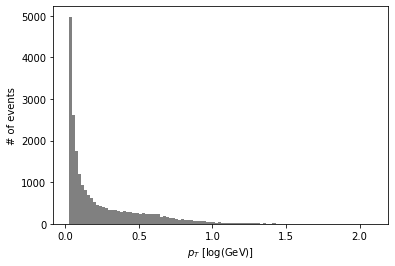

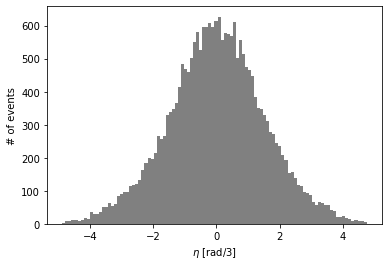

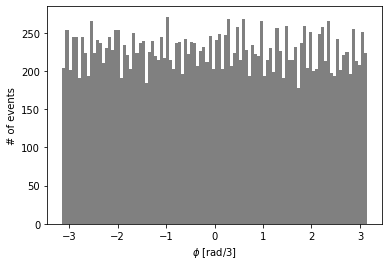

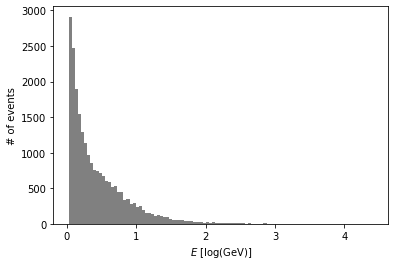

In [153]:
import matplotlib.pyplot as plt

unit_list = ['[log(GeV)]', '[rad/3]', '[rad/3]', '[log(GeV)]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']

branches=["pt","eta","phi","E"]

n_bins = 100

for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(data[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

Normalization of Data

In [154]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler
sc = StandardScaler()
mi = MinMaxScaler()

Text(0.5, 1.0, 'Normalized data')

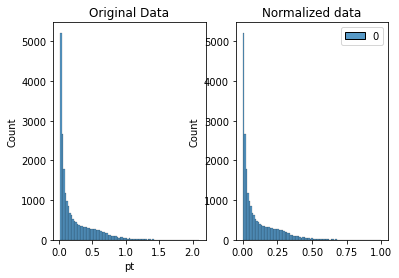

In [155]:
pt_normalized_data = mi.fit_transform(data['pt'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)
sns.histplot(data['pt'], ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(pt_normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

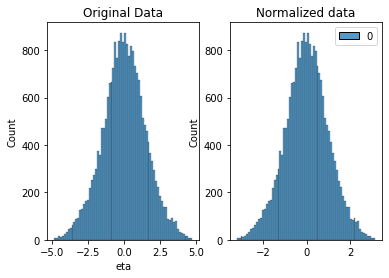

In [156]:
eta_normalized_data = sc.fit_transform(data['eta'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)
sns.histplot(data['eta'], ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(eta_normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

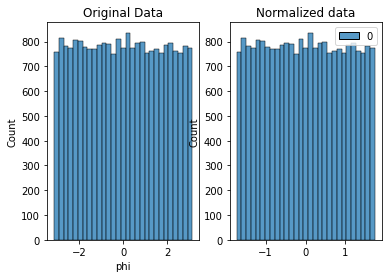

In [157]:
phi_normalized_data = sc.fit_transform(data['phi'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)
sns.histplot(data['phi'], ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(phi_normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

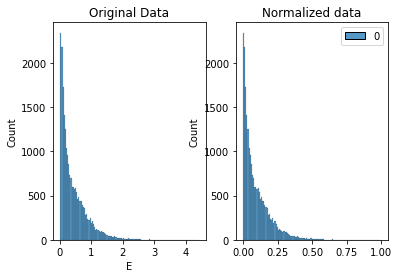

In [158]:
E_normalized_data = mi.fit_transform(data['E'].to_numpy().reshape(-1,1))

fig, ax=plt.subplots(1,2)
sns.histplot(data['E'], ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(E_normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

In [180]:
pt_normalized_data = pt_normalized_data.reshape(-1,)
eta_normalized_data = eta_normalized_data.reshape(-1,)
phi_normalized_data = phi_normalized_data.reshape(-1,)
E_normalized_data = E_normalized_data.reshape(-1,)
data = pd.DataFrame({
    'pt':pt_normalized_data,
    'eta':eta_normalized_data,
    'phi':phi_normalized_data,
    'E':E_normalized_data
})

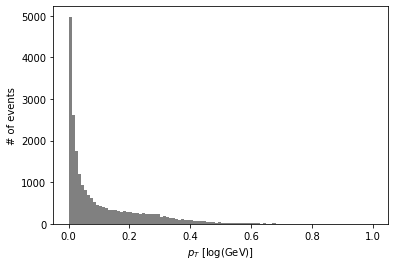

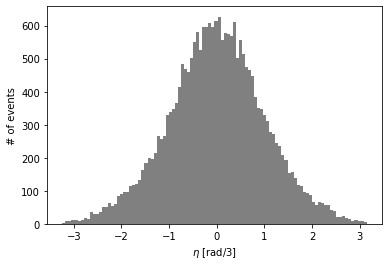

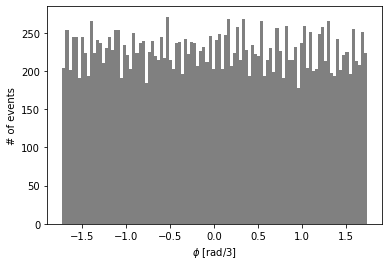

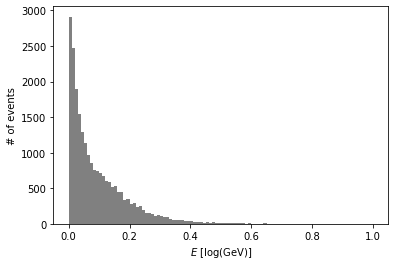

In [181]:
### Normalized 
unit_list = ['[log(GeV)]', '[rad/3]', '[rad/3]', '[log(GeV)]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']

branches=["pt","eta","phi","E"]

n_bins = 100

for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(data[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('# of events')
    #plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

In [182]:
train , test = train_test_split(data,test_size = 0.1,random_state = 41) ### Spliting the data

In [183]:
train.head()

,pt,eta,phi,E
18616,0.038633,0.776237,0.223513,0.036016
20456,0.004670,0.178687,-1.606629,0.002083
2433,0.205516,-0.274786,0.045452,0.105301
3012,0.423106,-0.195726,1.479977,0.207633
16324,0.022954,-0.574589,-1.632846,0.016520


In [184]:
print('Training sample:')
print(train.head())

print('\n')

print('Testing sample:')
print(test.head())

print('\n')

print('The number of entries in the training data:', len(train))
print('The number of entries in the validation data:', len(test))

Training sample:
             pt       eta       phi         E
18616  0.038633  0.776237  0.223513  0.036016
20456  0.004670  0.178687 -1.606629  0.002083
2433   0.205516 -0.274786  0.045452  0.105301
3012   0.423106 -0.195726  1.479977  0.207633
16324  0.022954 -0.574589 -1.632846  0.016520


Testing sample:
             pt       eta       phi         E
15071  0.093718  1.380912 -0.511494  0.197108
16731  0.038081 -0.464128 -0.933871  0.023078
3074   0.117203 -0.060904  0.784233  0.054953
11782  0.085622  0.574880  1.481292  0.058998
19915  0.005070 -1.598305  0.250032  0.035571


The number of entries in the training data: 20394
The number of entries in the validation data: 2267


In [ ]:
! [ -e /content ] && pip install -Uqq fastai ### Installing fastai

In [186]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from fastai import learner
from fastai.data import core
train_x = train
test_x = test
train_y = train_x  
test_y = test_x

train_ds = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
valid_ds = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))

In [166]:
### 
bs = 256
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)
dls = core.DataLoaders(train_dl, valid_dl)

In [233]:
### Model Config
class AE_3D_200_LeakyReLU(nn.Module):
    def __init__(self, n_features=4):
        super(AE_3D_200_LeakyReLU, self).__init__()
        self.en1 = nn.Linear(n_features, 200)
        self.en2 = nn.Linear(200, 100)
        self.en3 = nn.Linear(100, 50)
        self.en4 = nn.Linear(50, 3)
        self.de1 = nn.Linear(3, 50)
        self.de2 = nn.Linear(50, 100)
        self.de3 = nn.Linear(100, 200)
        self.de4 = nn.Linear(200, n_features)
        self.tanh = nn.Tanh()

    def encode(self, x):
        return self.en4(self.tanh(self.en3(self.tanh(self.en2(self.tanh(self.en1(x)))))))

    def decode(self, x):
        return self.de4(self.tanh(self.de3(self.tanh(self.de2(self.tanh(self.de1(self.tanh(x))))))))

    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)

    def describe(self):
        return 'in-200-100-50-3-50-100-200-out'

#model = AE_3D_200_LeakyReLU().double()
model = AE_3D_200_LeakyReLU()
model.to('cpu')

AE_3D_200_LeakyReLU(
  (en1): Linear(in_features=4, out_features=200, bias=True)
  (en2): Linear(in_features=200, out_features=100, bias=True)
  (en3): Linear(in_features=100, out_features=50, bias=True)
  (en4): Linear(in_features=50, out_features=3, bias=True)
  (de1): Linear(in_features=3, out_features=50, bias=True)
  (de2): Linear(in_features=50, out_features=100, bias=True)
  (de3): Linear(in_features=100, out_features=200, bias=True)
  (de4): Linear(in_features=200, out_features=4, bias=True)
  (tanh): Tanh()
)

In [234]:
print(model.describe())

in-200-100-50-3-50-100-200-out


In [235]:
from fastai.metrics import mse

loss_func = nn.MSELoss()


wd = 1e-6

recorder = learner.Recorder()
learn = learner.Learner(dls, model=model, wd=wd, loss_func=loss_func, cbs=recorder)
#was: learn = basic_train.Learner(data=db, model=model, loss_func=loss_func, wd=wd, callback_fns=ActivationStats, bn_wd=bn_wd, true_wd=true_wd)

Learning rate with the minimum loss: 0.002754228748381138
Learning rate with the steepest gradient: 0.0030199517495930195


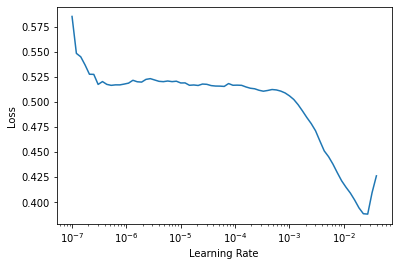

In [236]:
from fastai.callback import schedule

lr_min, lr_steep = learn.lr_find()

print('Learning rate with the minimum loss:', lr_min)
print('Learning rate with the steepest gradient:', lr_steep)

In [237]:
import time

start = time.perf_counter() # Starts timer
learn.fit_one_cycle(n_epoch=100, lr_max=lr_min)
end = time.perf_counter() # Ends timer
delta_t = end - start
print('Training took', delta_t, 'seconds')

[0, 0.3556936979293823, 0.21404989063739777, '00:00']
[0, 0.3556936979293823, 0.21404989063739777, '00:00']
[1, 0.11768823117017746, 0.04085414111614227, '00:00']
[1, 0.11768823117017746, 0.04085414111614227, '00:00']
[2, 0.042640116065740585, 0.017737416550517082, '00:00']
[2, 0.042640116065740585, 0.017737416550517082, '00:00']
[3, 0.01779799349606037, 0.008978010155260563, '00:00']
[3, 0.01779799349606037, 0.008978010155260563, '00:00']
[4, 0.008829230442643166, 0.005302636418491602, '00:01']
[4, 0.008829230442643166, 0.005302636418491602, '00:01']
[5, 0.003341321600601077, 0.0014335316373035312, '00:00']
[5, 0.003341321600601077, 0.0014335316373035312, '00:00']
[6, 0.0016892221756279469, 0.0012687880080193281, '00:00']
[6, 0.0016892221756279469, 0.0012687880080193281, '00:00']
[7, 0.0012886094627901912, 0.0010024537332355976, '00:00']
[7, 0.0012886094627901912, 0.0010024537332355976, '00:00']
[8, 0.0011186044430360198, 0.0009418755653314292, '00:00']
[8, 0.0011186044430360198, 0.00

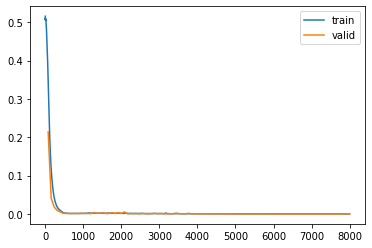

In [238]:
recorder.plot_loss()

In [239]:
learn.validate()

(#1) [4.680944130086573e-06]

In [240]:
import os
save_dir = "plotOutput"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [241]:
def custom_unnormalize(df):
    df['eta'] = df['eta'] * 5
    df['phi'] = df['phi'] * 3
    df['pt'] = 10**(df['pt'])
    df['E'] = 10**df['E']
    return df

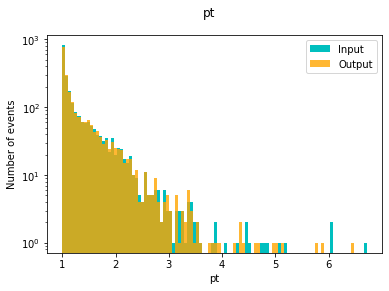

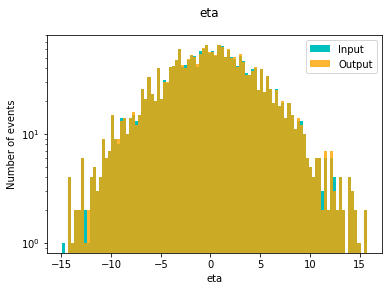

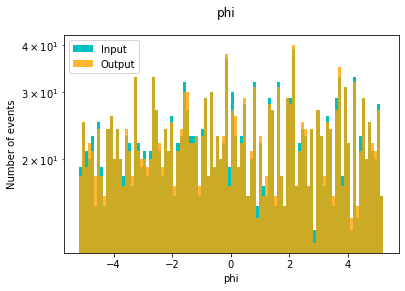

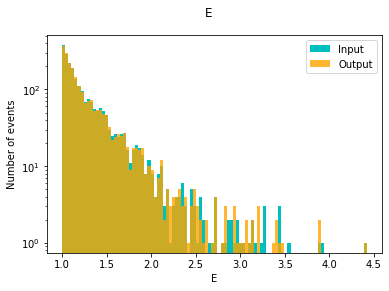

In [242]:
import numpy as np

plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$p_T$', r'$\eta$', r'$\phi$', r'$E$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

model.to('cpu')

save = True # Option to save figure

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = torch.tensor(test[idxs[0]:idxs[1]].values, dtype=torch.float)
#data = torch.tensor(test[idxs[0]:idxs[1]].values, dtype=torch.float).double()
pred = model(data)
pred = pred.detach().numpy()
data = data.detach().numpy()

data_df = pd.DataFrame(data, columns=test.columns)
pred_df = pd.DataFrame(pred, columns=test.columns)

unnormalized_data_df = custom_unnormalize(data_df)
unnormalized_pred_df = custom_unnormalize(pred_df)    
    
alph = 0.8
n_bins = 100
for kk in np.arange(4):
    plt.figure()
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    plt.suptitle(test.columns[kk])
    plt.xlabel(test.columns[kk])
    plt.ylabel('Number of events')
    # ms.sciy()
    plt.yscale('log')
    if save:
        plt.savefig(os.path.join(save_dir,test.columns[kk]+'.png'))
    plt.legend()


In [243]:
def getRatio(bin1,bin2):
    bins = []
    for b1,b2 in zip(bin1,bin2):
        if b1==0 and b2==0:
            bins.append(0.)
        elif b2==0:
            bins.append(None)
        else:
            bins.append((float(b2)-float(b1))/b1)
    return bins   

rat = getRatio(n_hist_data,n_hist_pred)
print(rat)

[-0.018617021276595744, 0.038461538461538464, 0.0, -0.005291005291005291, 0.05925925925925926, 0.0, -0.010638297872340425, -0.043478260869565216, -0.04054054054054054, 0.043478260869565216, -0.05357142857142857, 0.018867924528301886, -0.05263157894736842, -0.07692307692307693, 0.021739130434782608, 0.06666666666666667, -0.12, -0.07692307692307693, 0.08333333333333333, -0.038461538461538464, 0.0, 0.125, -0.18181818181818182, 0.0625, -0.10526315789473684, -0.058823529411764705, 0.21428571428571427, 0.0, -0.16666666666666666, 0.125, 0.0, -0.125, 0.2, -0.3333333333333333, 0.0, 2.0, 0.3333333333333333, 0.0, 0.25, -0.5, 0.3333333333333333, inf, -0.4, 0.6666666666666666, 2.0, -0.5, -0.5, inf, None, 0.0, 0.0, 0.0, 0.0, 2.0, None, None, 2.0, -0.5, 0.0, 0.0, inf, 0.0, 0.0, None, inf, None, None, 0.0, 0.0, inf, inf, -0.6666666666666666, inf, 0.0, None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
